**Задание**

**Цель:** изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных.

В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

Целевая переменная – MedHouseVal.

Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.

7. Исследуйте оставленные признаки на выбросы.

a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.

8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

a. Повторите п. 3, п. 4 на измененных данных.
9. Сформулируйте выводы по проделанной работе.

a. Кратко опишите какие преобразования были сделаны с данными.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**


In [173]:
import pandas as pd
import numpy as np

In [174]:
#Загружаем датасет
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [175]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [176]:
print(f'Название переменных:{housing.feature_names}')

print(f'Данные:{housing.data[:10]}')

print(f'Название классов:{housing.target_names}')
print(f'Значения классов:{housing.target}')

Название переменных:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Данные:[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]
 [ 4.03680000e+00  5.20000000e+01  4.76165803e+00  1.10362694e+00
   4.13000000e+02  2.13989637e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.65910000e+00  5.20000000e+01  4.93190661e+00  9.51361868e-01
   1.09400

In [177]:
#Создадим DataFrame
housing_frame = pd.DataFrame(housing.data)

# Делаем имена колонок такие же, как имена переменных
housing_frame.columns = housing.feature_names

# Добавляем столбец с целевой переменной
housing_frame['MedHouseVal'] = housing.target

# Смотрим, что получилось:
housing_frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [178]:
housing_frame.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [179]:
housing_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропуски не выявлены

**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [181]:
def get_metrics(X, y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    summury = pd.DataFrame({'Metrics': ['RMSE на обучающей выборке', 'RMSE на тестовом множестве', 'R2 на обучающей выборке', 'R2 на тестовом множестве'],
                            'Metrics_values': [rmse_train, rmse_test, r2_train, r2_test]})

    return summury

**4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**


In [182]:
model_0 = get_metrics(housing_frame.loc[:, housing_frame.columns != 'MedHouseVal'],
                      housing_frame['MedHouseVal'])
model_0

,Metrics,Metrics_values
0,RMSE на обучающей выборке,0.719676
1,RMSE на тестовом множестве,0.745581
2,R2 на обучающей выборке,0.612551
3,R2 на тестовом множестве,0.575788


**5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

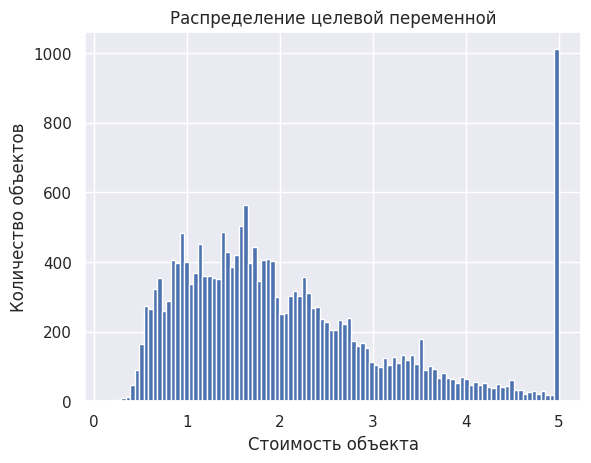

In [184]:
housing_frame['MedHouseVal'].hist(bins=100)
plt.xlabel('Стоимость объекта')
plt.ylabel('Количество объектов')
plt.title('Распределение целевой переменной')
plt.show()

[Text(0.5, 1.0, 'Распределение целевой переменной')]

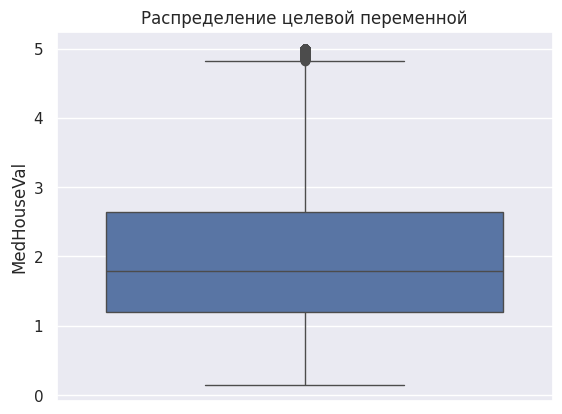

In [185]:
sns.boxplot(housing_frame['MedHouseVal']).set(title='Распределение целевой переменной')

Как видно из графиков распределения целевой переменной:

1) Целевая переменная распределена не нормально.

2) В значениях целевой перменной имеются незначительные выбросы

**6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.



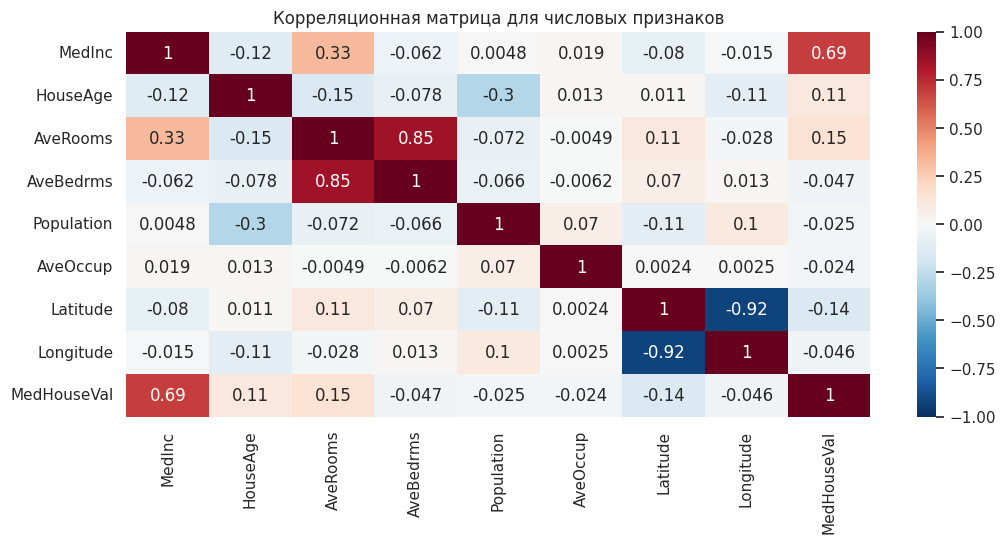

In [186]:
#Построим тепловую корреляционную матрицу

sns.set(font_scale=1.0)
plt.figure(figsize=(12,5))
sns.heatmap(
    housing_frame.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица для числовых признаков'); # указывает начало цветовых кодов от -1 до 1.

**Как видно из корреляционной матрицы:**

1) имеется высокая положительная корреляция между признаками AveRooms и AveBedrms (чем больше в доме комнат, тем и больше спален)

2) имеется относительно высокая положительная корреляция между признаками Medinc и MedHouseVal (целевая переменная) (чем выше доход населения в группе, тем выше стоимость жилья)

3) прослеживается слабая положительная связь между Medinc и AveRooms (возможно, люди с бОльшим доходом предпочитают покупать дома с бОльшим количеством комнат)

4) прослеживается слабая отрицательная связь между HouseAge и Population (возможно, районы с более старыми домами менее населенные).

Связь между остальными призаками либо отсутствует, либо имеет нелинейный характер.


**Таким образом, построим линейную модель на основании следующих признаков:**
- AveRooms
- AveBedrms
- Medinc
- HouseAge
- Population

In [187]:
model_1 = get_metrics(housing_frame[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']],
                      housing_frame['MedHouseVal'])
model_1

,Metrics,Metrics_values
0,RMSE на обучающей выборке,0.780927
1,RMSE на тестовом множестве,0.802133
2,R2 на обучающей выборке,0.543794
3,R2 на тестовом множестве,0.508995


**7. Исследуйте оставленные признаки на выбросы.**

a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.



In [188]:
#Список признаков, используемых для моделирования
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']

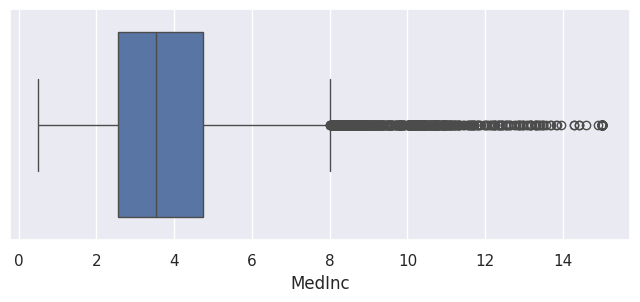

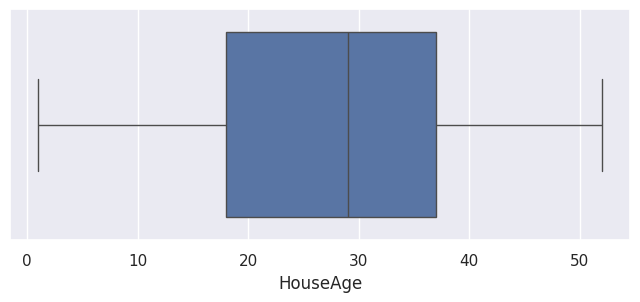

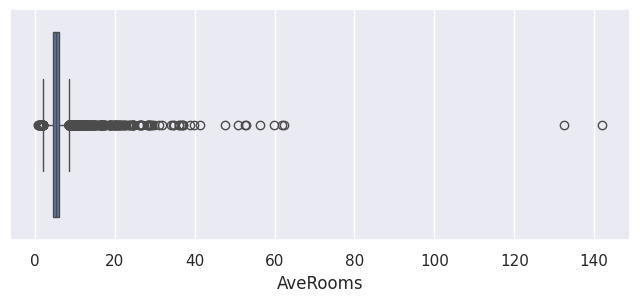

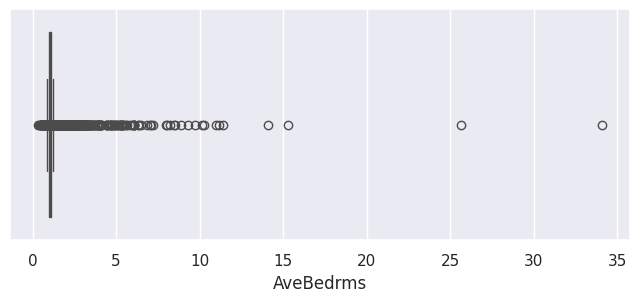

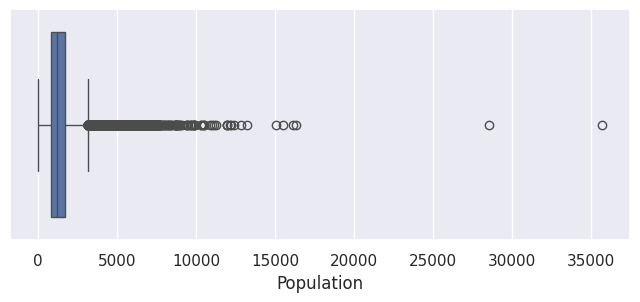

In [189]:
#Посмотрим на выбросы
for col in cols:
    plt.figure(figsize=(8, 3))
    x = housing_frame.index
    ax = sns.boxplot(x=housing_frame[col])
    plt.show()

In [190]:
#Список признаков, содержащих выбросы
cols_outlier = ['MedInc', 'AveRooms', 'AveBedrms', 'Population']

In [191]:
housing_frame_for_outlier = housing_frame.copy()
housing_frame_for_outlier.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [192]:
# Вычисление границ IQR
for col in cols_outlier:
    Q1, Q3 = housing_frame_for_outlier[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Отсеивание выбросов
    housing_frame_for_outlier = housing_frame_for_outlier[(housing_frame_for_outlier[col] >= lower_bound) & (housing_frame_for_outlier[col] <= upper_bound)]

In [193]:
housing_frame_for_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17341 entries, 3 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       17341 non-null  float64
 1   HouseAge     17341 non-null  float64
 2   AveRooms     17341 non-null  float64
 3   AveBedrms    17341 non-null  float64
 4   Population   17341 non-null  float64
 5   AveOccup     17341 non-null  float64
 6   Latitude     17341 non-null  float64
 7   Longitude    17341 non-null  float64
 8   MedHouseVal  17341 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


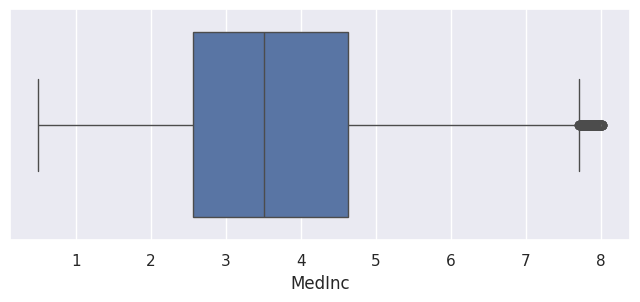

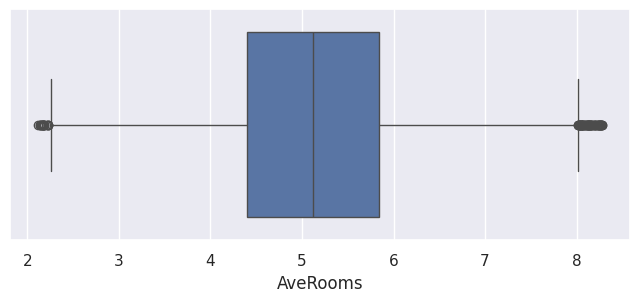

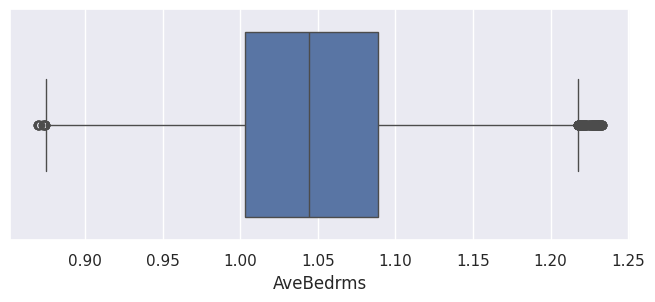

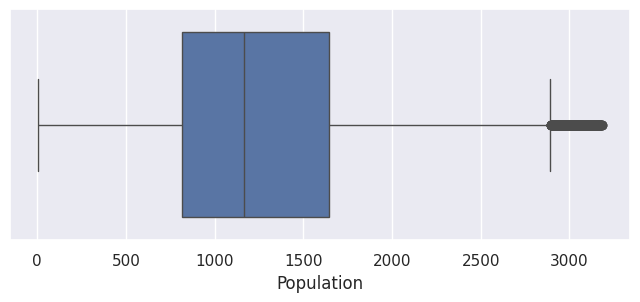

In [194]:
for col in cols_outlier:
    plt.figure(figsize=(8, 3))
    x = housing_frame_for_outlier.index
    ax = sns.boxplot(x=housing_frame_for_outlier[col])
    plt.show()

In [195]:
model_2 = get_metrics(housing_frame_for_outlier[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']],
                      housing_frame_for_outlier['MedHouseVal'])
model_2

,Metrics,Metrics_values
0,RMSE на обучающей выборке,0.740075
1,RMSE на тестовом множестве,0.711271
2,R2 на обучающей выборке,0.520803
3,R2 на тестовом множестве,0.539445


**8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.**

a. Повторите п. 3, п. 4 на измененных данных.


In [196]:
housing_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [197]:
#Создадим два новых признака
housing_frame['population_log'] = np.log(housing_frame['Population'])
housing_frame['HouseAge_power'] = housing_frame['HouseAge']**2

In [198]:
housing_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,population_log,HouseAge_power
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5.774552,1681.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,7.783641,441.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,6.206576,2704.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,6.324359,2704.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,6.336826,2704.0


In [199]:
model_3 = get_metrics(housing_frame[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'population_log', 'HouseAge_power']],
                      housing_frame['MedHouseVal'])
model_3

,Metrics,Metrics_values
0,RMSE на обучающей выборке,0.779799
1,RMSE на тестовом множестве,0.801753
2,R2 на обучающей выборке,0.545110
3,R2 на тестовом множестве,0.509460


**9. Сформулируйте выводы по проделанной работе.**

**a. Кратко опишите какие преобразования были сделаны с данными.**

В рамках настоящей работы было сделано следующее:
1. Загружен и сформирован датасет для работы
2. Проведена проверка данных на наличие пропусков
3. Создана функция для обучения модели с выводом значений согласно п.b задания 9.
4. Построен график распределения целевой переменной.
Как видно из графика boxplot признак содержит незначительные выбросы, которые можно оставить без ущерба для качества модели.
5. Построена корреляционная матрица, на оснвоании которой проведен отбор признаков для дальнейшего анализа.
6. Проведен анализ признаков на выбросы, сформирован датафрейм без явных выбросов.
7. Построено 4 модели с различными признакми (до преобразрований, после преобразований, с выбросами и без).

  Результат обучения модели предствлен в п.b задания 9.

**b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.**

In [200]:
#Объединим результаты обучения моделей в один датафрейм
df_metrics = pd.concat([model_0.T, model_1.T.iloc[[1]], model_2.T.iloc[[1]], model_3.T.iloc[[1]]], axis=0)

In [201]:
df_metrics.reset_index(drop=True, inplace=True)

In [202]:
# назначим новые названия столбцов
df_metrics.columns = df_metrics.iloc[0]

In [203]:
# уберем строку, дублирующую название столбцов
df_metrics = df_metrics.drop(0).reset_index(drop=True)

In [204]:
df_metrics

,RMSE на обучающей выборке,RMSE на тестовом множестве,R2 на обучающей выборке,R2 на тестовом множестве
0,0.719676,0.745581,0.612551,0.575788
1,0.780927,0.802133,0.543794,0.508995
2,0.740075,0.711271,0.520803,0.539445
3,0.779799,0.801753,0.54511,0.50946


In [205]:
#создадим итоговую таблицу согласно заданию
final_df = pd.DataFrame({'Model_name': ['model_0', 'model_1', 'model_2', 'model_3']})
final_df = pd.concat([final_df, df_metrics], sort=False, axis=1)

In [206]:
final_df

,Model_name,RMSE на обучающей выборке,RMSE на тестовом множестве,R2 на обучающей выборке,R2 на тестовом множестве
0,model_0,0.719676,0.745581,0.612551,0.575788
1,model_1,0.780927,0.802133,0.543794,0.508995
2,model_2,0.740075,0.711271,0.520803,0.539445
3,model_3,0.779799,0.801753,0.54511,0.50946


In [207]:
features_val = [['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'],
                ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'],
                ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'],
                ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'population_log', 'HouseAge_power']
                ]

In [208]:
#добавим столбец с признаками, на основании которых обучалась модель
final_df.insert(loc=len(final_df.columns), column='features', value=features_val)

**Результаты обучения моделей**

In [139]:
final_df

,Model_name,RMSE на обучающей выборке,RMSE на тестовом множестве,R2 на обучающей выборке,R2 на тестовом множестве,features
0,model_0,0.719676,0.745581,0.612551,0.575788,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
1,model_1,0.780927,0.802133,0.543794,0.508995,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
2,model_2,0.740075,0.711271,0.520803,0.539445,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
3,model_3,0.779799,0.801753,0.54511,0.50946,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."



**c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**

Как следует из итоговой таблицы,
1. model_2 имеет лучший показатель RMSE на тестовой выборке
2. Вместе с тем самый высокий коэффициент детерминации (R2) у model_0 (0,5758), что означает, что используемые для анализа признаки лишь на 57,58% объясняют значение таргета.

Учитывая, что чем ближе R2 к 1, тем лучше качество модели, ни одну из моделей нельзя назвать удачной.

Требуется дополнительная работа с признаками для улучшения метрик качества.